<center>

<h1> Graph Search </h1>
<h2> CS3100 Fall 2019 </h2>
</center>

## Review

### Previously

* Countdown, Type Inference, Program Synthesis.
  
### This lecture

* Graph search
  + Solving a Maze
  + and other problems. 

## How to reach the center of the maze?

<center>
    
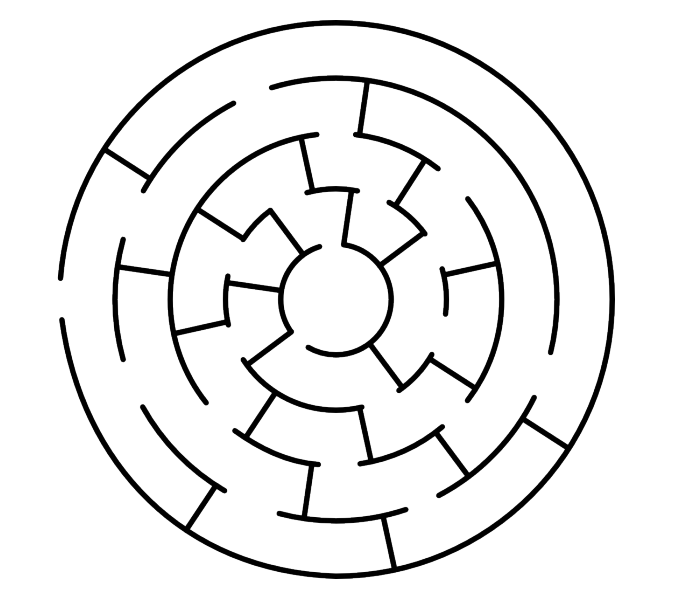
</center>


* There are multiple paths.
   + Only some of the paths may lead to the center.
* Solving the maze requires graph search.

## Learning Goals

* How to encode this maze as a graph search problem.
* How to solve this program.
* How to handle cycles in the search path.

## Each opening is a vertex

<center>
    
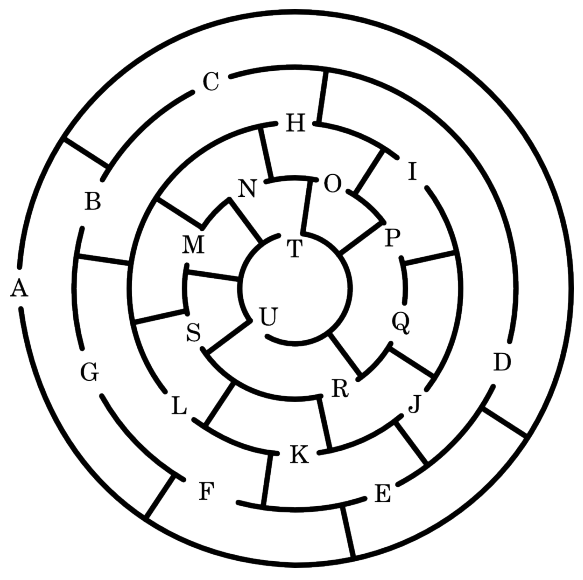
</center>

## Edges connect adjacent openings

<center>
    
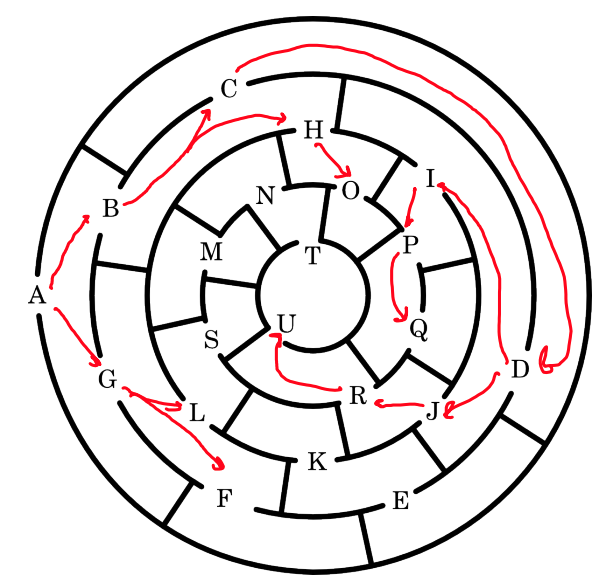
</center>

A `route(A,B)` holds if `B` is one of the openings reachable on entering through `A`.

## Abstract the maze into a graph.

<center>

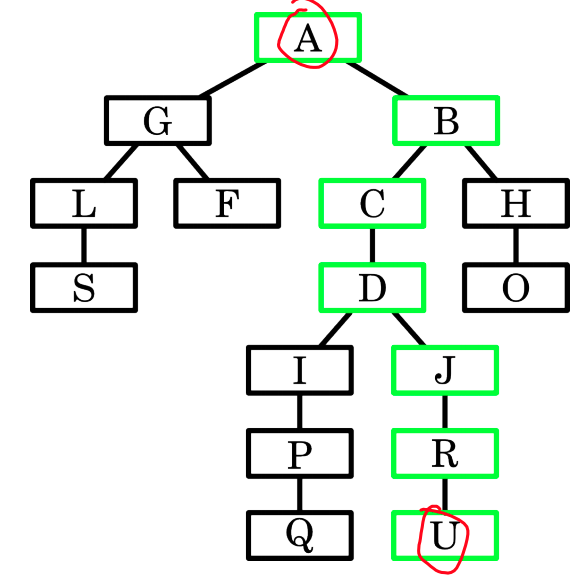
</center>

## Encode the graph as facts

In [ ]:
route(a,g).
route(a,b).
route(g,l).
route(g,f).
route(l,s).
route(b,c).
route(b,h).
route(c,d).
route(h,o).
route(d,i).
route(d,j).
route(i,p).
route(p,q).
route(j,r).
route(r,u).

## Encode the rules for solving the maze

In [ ]:
travel(A,A).
travel(A,C) :- route(A,B), travel(B,C).

start(a).
finish(u).

solve :- start(A), finish(B), travel(A,B).

In [ ]:
?- solve.

Prolog says that there is a path from a to u.

## Remembering the route

We can attach a log to remember the travel route. 

In [ ]:
travellog(A,A,[]).
travellog(A,C,[A-B|Steps]) :-
  route(A,B), travellog(B,C,Steps).
solve(L) :- start(a), finish(u), travellog(A,B,L).

In [ ]:
?- solve(L).

## What if there are cycles in the graph

<center>
    
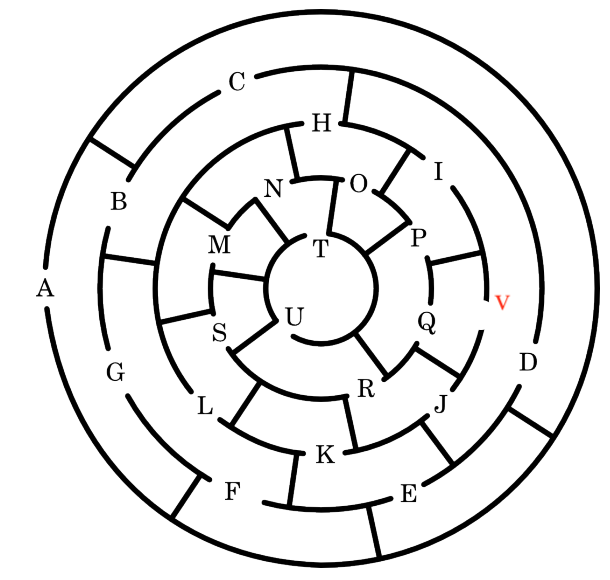
</center>

* Prolog does DFS
* Search can go into an infinite loop `a-b-c-d-v-q-p-i-v-q-p-i-v-....`

## Cyclic graph

<center>
    
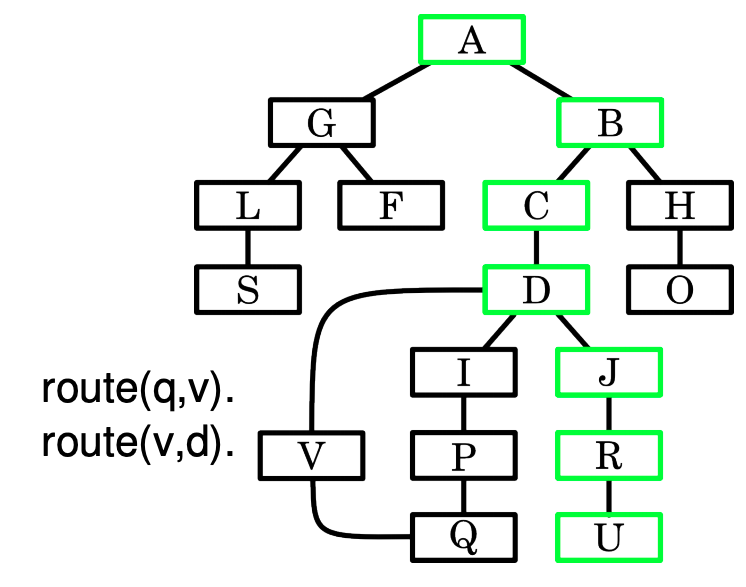
</center>

## Cyclic graph

In [ ]:
route(q,v).
route(v,d).

In [ ]:
?- solve.

## Remembering visited nodes

In [ ]:
travelsafe(A,A,_).
travelsafe(A,C,Visited) :-
  route(A,B),
  \+member(B,Visited), 
  travelsafe(B,C,[B|Visited]).

In [ ]:
solve2 :- start(A), finish(B), travelsafe(A,B,[]).

In [ ]:
?- solve2.

**Exercise:** Implement `solve2` with a log.

## Missionaries and Cannibals

Maze is quite straight-forward to map. Other problems not so much.

<center>

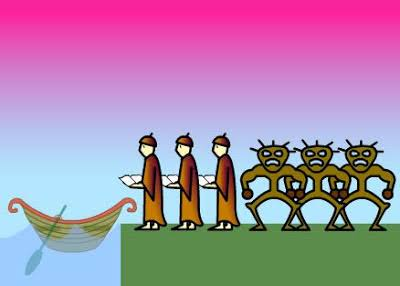
</center>

* 3 missionaries, 3 cannibals and 1 boat. 
* The boat carries 2 people.
* If the Cannibals outnumber the Missionaries they will eat them.
* Get them all from one side of the river to the other?

## Represent the state

We need to represent the number of missionaries and cannibals on each bank, and where the boat is.

In [1]:
start(3-3-0-0-l).
finish(0-0-3-3-_).

Added 2 clauses(s).

## Check for safety of a state

A state is safe if no missionary gets eaten. 

A missionary gets eaten if there is at least one missonary on a bank and the number of cannibals on that bank outnumber them.

In [2]:
safe(0-_-M2-C2-_) :- M2 >= C2.
safe(M1-C1-0-_-_) :- M1 >= C1.
safe(M1-C1-M2-C2-_) :- M1 >= C1, M2 >= C2.

Added 3 clauses(s).

## Defining steps

In order to define a transition, we need all possible ways we can take a step. The boat can carry at most 2 people and at least one person.

In [3]:
carry(2,0).
carry(1,1).
carry(0,2).
carry(1,0).
carry(0,1).

Added 5 clauses(s).

## Defining transitions

A predicate `step(A,B)` is defined if there is a `carry/2` that moves the state from `A` to `B`.

In [4]:
step(M1-C1-M2-C2-l,M3-C3-M4-C4-r) :-
  carry(X,Y),
  M1 >= X, M3 is M1 - X, M4 is M2+X,
  C1 >= Y, C3 is C1 - Y, C4 is C2+Y.
  
step(M1-C1-M2-C2-r,M3-C3-M4-C4-l) :-
  carry(X,Y),
  M2 >= X, M4 is M2 - X, M3 is M1+X,
  C2 >= Y, C4 is C2 - Y, C3 is C1+Y.

Added 2 clauses(s).

* Observe that there may be multiple possible target transition for a source transition.
* Each such possible transition is an outedge in the game graph.

## Defining the game

We need to define the game as a series of steps, where each step is safe and we do not visit the same steps again.

We use `Visited` list to track visited states and maintain a log of steps.

In [5]:
travel(A,A,_,[]).
travel(A,C,Visited,[B|Steps]) :- 
  step(A,B), safe(B), \+member(B,Visited), travel(B,C,[A,B|Visited],Steps).

Added 2 clauses(s).

## Solving the game

Solution to the same is a series steps that go from initial to final state.

In [6]:
solve(L) :- start(A), finish(B), travel(A,B,[],L).

Added 1 clauses(s).

In [7]:
?- solve(L) {1}.

L = [ -(-(-(2, 2), 1), 1)-r, -(-(-(3, 2), 0), 1)-l, -(-(-(3, 0), 0), 3)-r, -(-(-(3, 1), 0), 2)-l, -(-(-(1, 1), 2), 2)-r, -(-(-(2, 2), 1), 1)-l, -(-(-(0, 2), 3), 1)-r, -(-(-(0, 3), 3), 0)-l, -(-(-(0, 1), 3), 2)-r, -(-(-(1, 1), 2), 2)-l, -(-(-(0, 0), 3), 3)-r ] .

## Solving the game

The solution is the same is what is illustrated here:

<center>
    
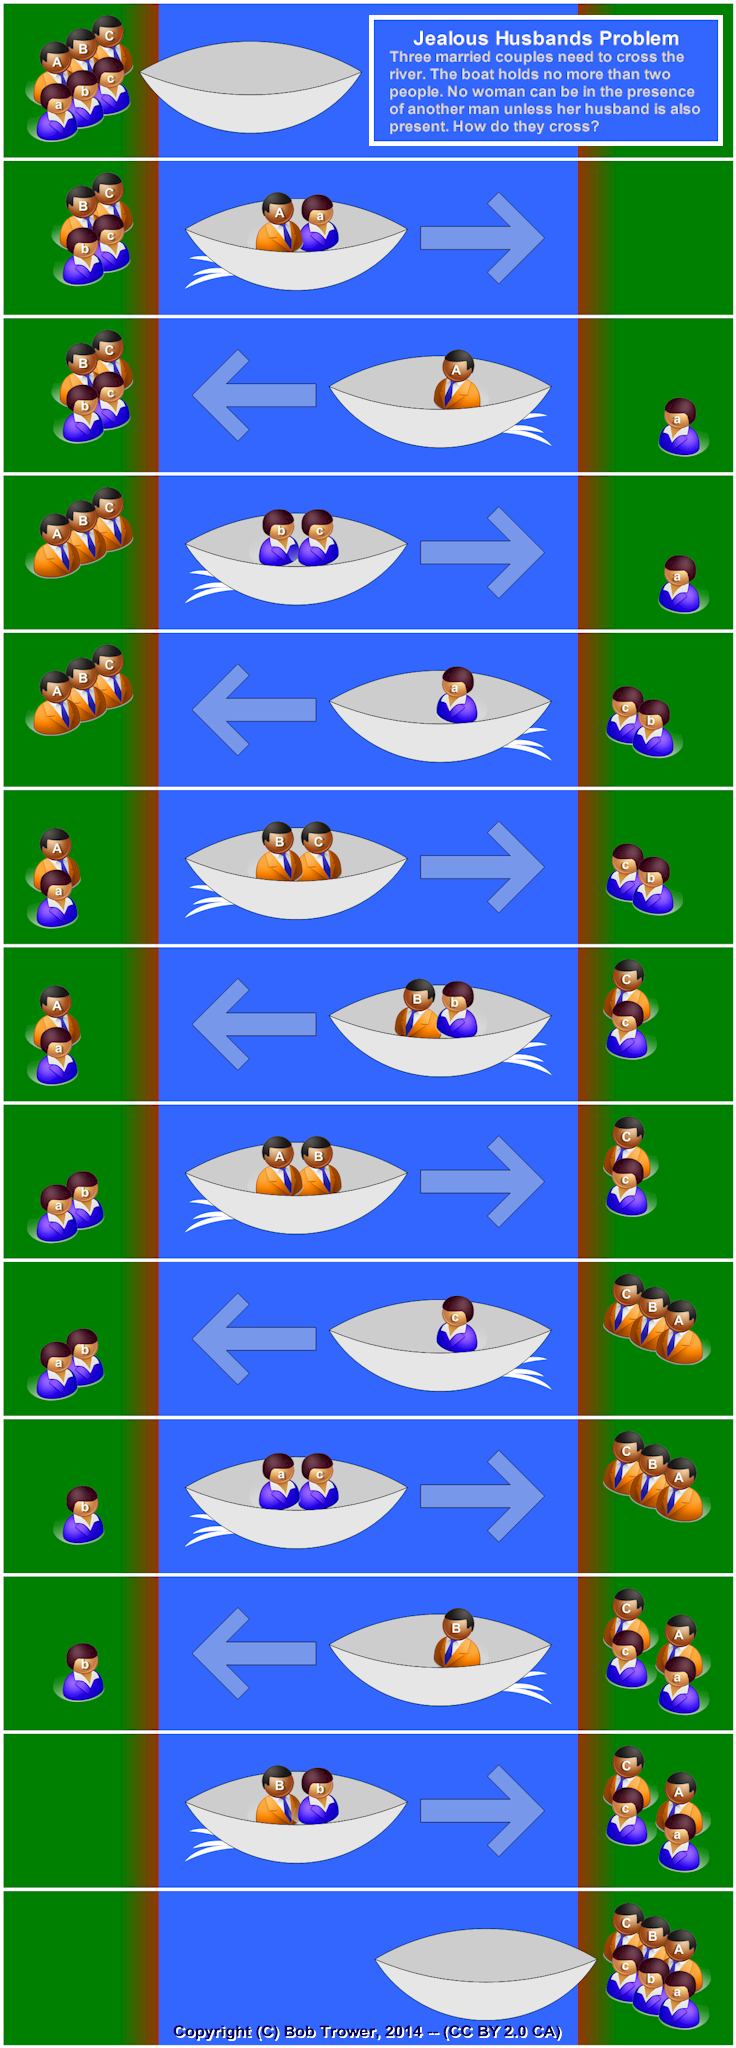
</center>

## Exercise: Towers of Hanoi

<center>
    
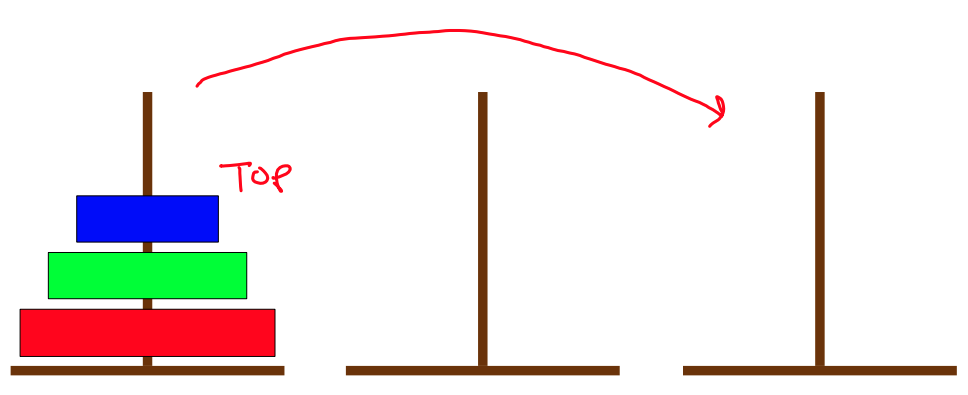
</center>

<center>

<h1> Fin. </h1>
</center>